In [36]:
from scipy import optimize
from scipy import interpolate as interp
import numpy as np
from skimage import measure
from eagartsai_amui.simulation.eagartsai import EagarTsai

In [42]:
bc = 'temp'
V = 0.4 # Velocity [m/s]
absorp = 1 # Absorptivity
cp = 561.5  # Specific Heat [J/kgK]
k = 7.2 # Thermal Conductivity [W/mK]
beamD = 50e-6  # Beam Diameter [m]
rho = 4470.5 # Density [kg/m^3]
P = 1 # Power [W]
melt_T= 1649 # Melting Temperature [K]
save = False 
resolution = 10e-6 # Resolution [m]
bounds = {'x': [-1000e-6, 2000e-6], 'y': [-500e-6, 500e-6], 'z': [-400e-6, 0]}


test = EagarTsai(resolution,
                bc = bc, 
                V = V, 
                absorp = absorp, 
                cp = cp, 
                k = k, 
                beamD = beamD, 
                rho = rho,
                P = P, 
                melt_T= melt_T,
                bounds = bounds) 


In [38]:
def rescale_baseline(theta, new_power, new_abs, current_abs=1, current_power=1, baseline_temperature=300):
    """
    Rescales the baseline temperature based on the new power and absorption values.
    
    Parameters:
    theta (float): The current temperature.
    new_power (float): The new power value.
    new_abs (float): The new absorption value.
    current_abs (float, optional): The current absorption value. Default is 1.
    current_power (float, optional): The current power value. Default is 1.
    baseline_temperature (float, optional): The baseline temperature of the build plate. Default is 300.
    
    Returns:
    float: The rescaled temperature.
    """
    old_absorbed_power = current_abs * current_power
    new_absorbed_power = new_abs * new_power
    new_theta = (theta - baseline_temperature) * (new_absorbed_power / old_absorbed_power) + baseline_temperature
    return new_theta


In [44]:
test = EagarTsai(resolution,
                bc = bc, 
                V = V, 
                absorp = 1, 
                cp = cp, 
                k = k, 
                beamD = beamD, 
                rho = rho,
                P = P, 
                melt_T= melt_T,
                bounds = bounds) 
test.reset()

[<Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>]

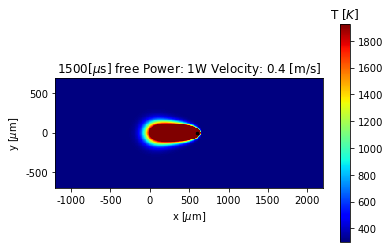

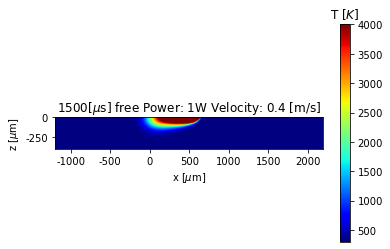

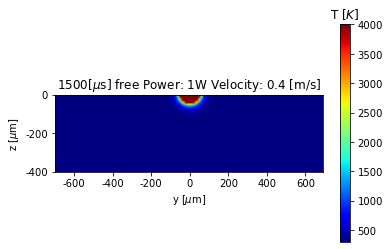

In [60]:
test.reset()
test.forward(1500e-6, 0, V = V, P = P)
test.theta = rescale_baseline(test.theta, new_power = 300, new_abs = 0.3)
test.plot()

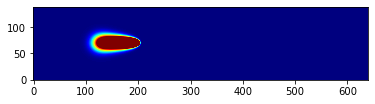

In [30]:
import matplotlib.pyplot as plt
plt.imshow(test.theta[:,:, -1].T, origin = 'lower', vmin = 293, vmax = 5000, cmap = 'jet')

In [11]:
test.theta = 280*(test.theta - 300) + 300

[<Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>]

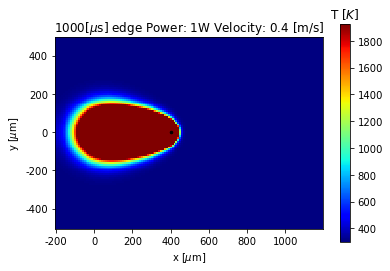

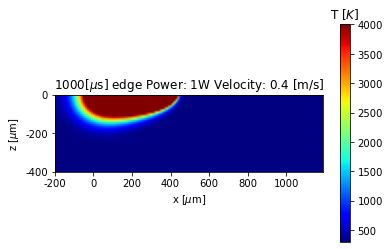

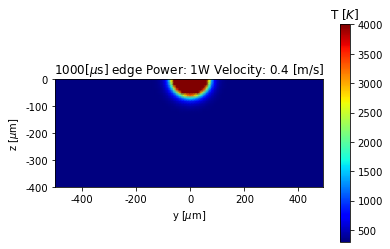

In [12]:
test.plot()

In [5]:
bc = 'flux'
V = 0.4 # Velocity [m/s]
absorp = 1 # Absorptivity
cp = 561.5 # Specific Heat [J/kgK]
k = 7.2 # Thermal Conductivity [W/mK]
beamD = 100e-6 # Beam Diameter [m]
rho = 4470.5 # Density [kg/m^3]
P = 280 # Power [W]
melt_T= 1649 # Melting Temperature [K]
save = False
resolution = 20e-6 # Resolution [m]
bounds = {'x': [0, 1000e-6], 'y': [-300e-6, 300e-6], 'z': [-400e-6, 0]}
output_folder = None
show = False

test = EagarTsai(resolution,
                    bc = bc, 
                    V = V, 
                    absorp = absorp, 
                    cp = cp, 
                    k = k, 
                    beamD = beamD, 
                    rho = rho,
                    P = P, 
                    melt_T= melt_T,
                    bounds = bounds) 
    #test = EagarTsai(5e-6)




In [6]:
test.theta.shape

(70, 50, 21)

In [7]:

test.forward(500-6, 0, V = V, P = P)

More than two edges


KeyboardInterrupt: 

[<Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>]

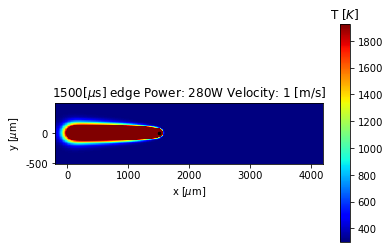

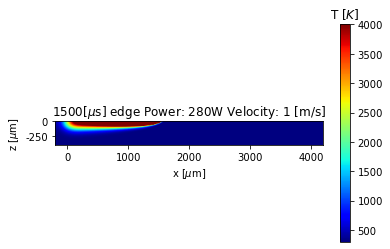

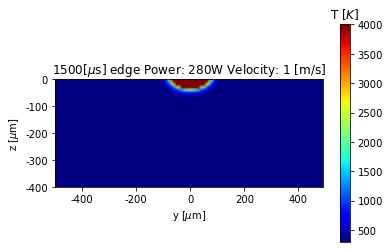

In [ ]:
test.plot()